# <center> Simulación caso de Negocio - Credit Scoring </center>

El objetivo de esta actividad es diseñar e implementar un modelo de Credit Scoring en Python para la resolución de un problema en el que cuenta con variables numéricas y categóricas y en el que se busca fortalecer los conocimientos teóricos y prácticos de la aplicación un sistema de recomendación en una empresa. 

💡 _**Nota**_: _Este material ha sido preparado por la **Universidad de las Américas - UDLA**. Parte del contenido ha sido adaptado a partir de material público liberado en [Kaggle](http://kaggle.com), [Datacamp](http://datacamp.com) y otros sitios web._

In [4]:
#pip install optbinning==0.17.1

In [5]:
#!pip install dataprep

## Sobre la empresa

El **Banco de Crédito del Perú (BCP)** es un banco peruano, fundado en 1889. Es propiedad del conglomerado financiero **Credicorp**. El **BCP** es considerado la entidad bancaria más grande del país. Entre los servicios que ofrece se encuentran financiamientos para comercio exterior, arrendamiento, seguros y asesoría financiera.

En la actualidad, **Banco de Crédito del Perú (BCP)** cuenta con 375 agencias, más de 1.800 cajeros y más de 5.600 agentes BCP.


## 1. Evaluación de necesidades del negocio
La fase de evaluación del caso de negocio requiere que se cree, evalúe y apruebe un caso de negocio antes de proceder a las tareas reales de análisis práctico.

 **BCP** como parte de su estrategia de fortalecimiento en la gestión de riesgo de crédito ha decidido implementar un modelo de *credit scoring* para el segmento de Crédito de Vivienda. Para este fin, se ha solicitado al área de Riesgo de Crédito cree un modelo que evalúe la probabilidad de Default(impago) para los futuros clientes de este producto.

# 2. Identificación de datos
La etapa de identificación de datos consiste en identificar los conjuntos de datos necesarios para el proyecto de análisis y sus fuentes.


**Dataset**:

El conjunto de datos contiene la información de alrededor de 340 operaciones de crédito con garantía hipotecaria otorgadas dentro de los últimos 2 años.

**Diccionario de datos**:

* `DNI`: Identificación del cliente
* `Tipo de vivienda`: tipo de vivienda actual del cliente
* `Ingreso`: ingreso anual al momento de la solicitud
* `Default`: 1 en caso de que se cumplan 120 días de atraso en los 12 meses luego de la colocación
* `Flg_vehicular`:  1 en caso de que el cliente cuente con un crédito vehicular.

# 3. Adquisición y filtrado de datos
Durante la etapa de adquisición y filtrado de datos se recopilan los datos de todas las fuentes de datos que se identificaron durante la etapa Identificación de datos.

# 4. Extracción de datos
Durante esta etapa se debe extraer datos dispares y transformarlos en un formato que pueda facilitar el análisis de datos. 

**Importar librerías**
```Python
# Sintaxis general
import modulo as alias
- **modulo**: (módulo) librería a importar.
- **alias**: alias con el nos referiremos a la libería. 
Ejemplo: 
  - Importamos la librería pandas:
import pandas as pd
```

In [6]:
import optbinning as optbin
import dataprep.eda as dpeda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model as sklm
from sklearn import model_selection as skmodsel
from sklearn import metrics as skmet
from sklearn import set_config
set_config(display="diagram")

**Cargar el dataset**

```Python
Leemos un archivo usando el alias **pd**, luego punto **.**, y a seguir la función a utilizar **read_csv**.
Ejemplo:
df = pd.read_csv("data/nombre_archivo.csv")
```

In [7]:
loan_data = pd.read_csv("CreditoHipotecario.csv")
loan_data.head()

,DNI,TipoVivienda,Ingreso,Default,Flg_vehicular
0,1231497,Familiar,128000,1,0
1,1231498,Alquilada,40000,0,1
2,1231499,Alquilada,41600,0,1
3,1231500,Alquilada,44800,0,1
4,1231501,Alquilada,46400,0,1


In [8]:
loan_data.set_index('DNI', inplace=True)
loan_data.head(1)

,TipoVivienda,Ingreso,Default,Flg_vehicular
DNI,,,,
1231497,Familiar,128000,1,0


# 5.Validación y limpieza de datos
Los datos no válidos pueden sesgar y falsear los resultados de los análisis. La etapa de validación y depuración de datos se enfoca en establecer reglas de validación a menudo complejas y a eliminar cualquier dato no válido conocido.

**EDA - Análisis exploratorio de datos**

In [9]:
loan_data.shape
loan_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Ingreso,339.0,117713.569322,86141.327689,19500.0,68400.0,104000.0,144000.0,1008000.0
Default,339.0,0.702065,0.458027,0.0,0.0,1.0,1.0,1.0
Flg_vehicular,339.0,0.300885,0.459321,0.0,0.0,0.0,1.0,1.0


<Axes: ylabel='DNI'>

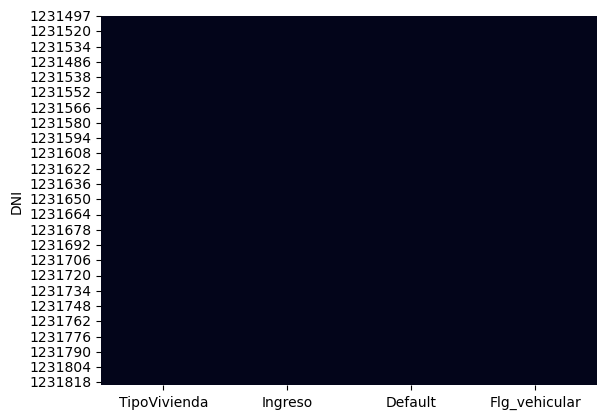

In [10]:
import seaborn as sns
sns.heatmap(loan_data.isnull(), cbar=False)

<Axes: >

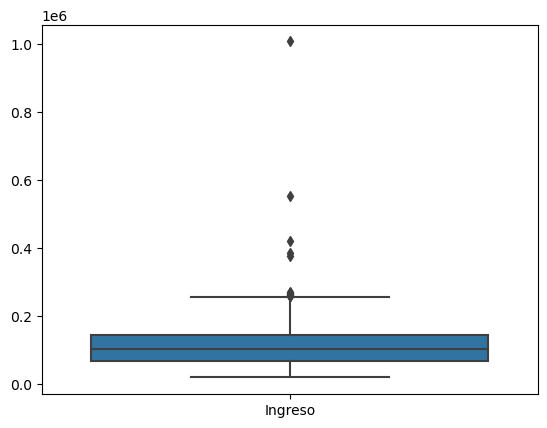

In [11]:
sns.boxplot(data= loan_data[['Ingreso']] ) 


**Limpieza de datos**

Podemos obsevar que aparentemen existen valores ouliers.

In [12]:
np.percentile(loan_data['Ingreso'], 99)

382340.00000000006

In [13]:
loan_data[loan_data['Ingreso']>382340.0].count()

TipoVivienda     4
Ingreso          4
Default          4
Flg_vehicular    4
dtype: int64

In [14]:
loan_data = loan_data[loan_data['Ingreso']<382340.0]

**Transformación de datos**

In [15]:
loan_data

,TipoVivienda,Ingreso,Default,Flg_vehicular
DNI,,,,
1231497,Familiar,128000,1,0
1231498,Alquilada,40000,0,1
1231499,Alquilada,41600,0,1
1231500,Alquilada,44800,0,1
1231501,Alquilada,46400,0,1
...,...,...,...,...
1231812,Alquilada,91800,1,0
1231813,Propia,214200,0,1
1231814,Alquilada,117000,1,1


# 6. Agregación y representación de datos
La etapa de agregación y representación de datos, se dedica a integrar múltiples conjuntos de datos para obtener una visión unificada.

Este caso de uso no requiere la integración de otros datos.

# 7. Análisis de datos
La etapa de análisis de datos se enfoca en llevar a cabo la tarea de análisis propiamente dicha, que suele implicar uno o más tipos de análisis

In [16]:
# Variables dependientes
var_x = list(set(loan_data.columns).difference(set(['Default'])))
print(var_x)


['Ingreso', 'TipoVivienda', 'Flg_vehicular']


In [17]:
X = loan_data[var_x]
y = loan_data['Default']

In [18]:
X_train, X_test, y_train, y_test = skmodsel.train_test_split(X, y, train_size = 0.7, random_state=42)


In [19]:
print('X train:',X_train.shape)
print('X test:',X_test.shape)
print('y train:',y_train.shape)
print('y test:',y_test.shape)

X train: (234, 3)
X test: (101, 3)
y train: (234,)
y test: (101,)


In [20]:
X_train


,Ingreso,TipoVivienda,Flg_vehicular
DNI,,,
1231509,48000,Alquilada,1
1231528,126400,Familiar,0
1231767,167400,Propia,0
1231777,113400,Alquilada,0
1231538,62400,Alquilada,0
...,...,...,...
1231670,93600,Familiar,0
1231553,35100,Alquilada,0
1231588,45500,Alquilada,0


In [21]:
# Criterio de selección en optbinnning
sel_crt = {
    "iv": {"min": 0.05, "max": 1.4}
}

In [22]:
binpro = optbin.BinningProcess(var_x, selection_criteria=sel_crt)


In [23]:
# Regresión logística
logreg = sklm.LogisticRegression(class_weight='balanced')

In [24]:
# Scorecard
scorecard = optbin.Scorecard(binning_process=binpro,
                             estimator=logreg, 
                             scaling_method="min_max", scaling_method_params={"min":300, "max":1000})

In [25]:
var_x

['Ingreso', 'TipoVivienda', 'Flg_vehicular']

In [26]:
scorecard
X_train


,Ingreso,TipoVivienda,Flg_vehicular
DNI,,,
1231509,48000,Alquilada,1
1231528,126400,Familiar,0
1231767,167400,Propia,0
1231777,113400,Alquilada,0
1231538,62400,Alquilada,0
...,...,...,...
1231670,93600,Familiar,0
1231553,35100,Alquilada,0
1231588,45500,Alquilada,0


## Implementación

In [27]:
scorecard_fit = scorecard.fit(X_train, y_train, show_digits=4)


In [28]:
scorecard.information(print_level=1)

optbinning (Version 0.17.1)
Copyright (c) 2019-2022 Guillermo Navas-Palencia, Apache License 2.0

  Statistics
    Number of records                    234
    Number of variables                    3
    Target type                       binary

    Number of numerical                    2
    Number of categorical                  1
    Number of selected                     2

  Timing
    Total time                          0.22 sec
    Binning process                     0.18 sec   ( 84.53%)
    Estimator                           0.02 sec   (  7.56%)
    Build scorecard                     0.02 sec   (  7.65%)
      rounding                          0.00 sec   (  0.00%)



In [29]:
scorecard.information(print_level=2)

optbinning (Version 0.17.1)
Copyright (c) 2019-2022 Guillermo Navas-Palencia, Apache License 2.0

  Begin options
    binning_process                      yes   * U
    estimator                            yes   * U
    scaling_method                   min_max   * U
    scaling_method_params                yes   * U
    intercept_based                    False   * d
    reverse_scorecard                  False   * d
    rounding                           False   * d
    verbose                            False   * d
  End options

  Statistics
    Number of records                    234
    Number of variables                    3
    Target type                       binary

    Number of numerical                    2
    Number of categorical                  1
    Number of selected                     2

  Timing
    Total time                          0.22 sec
    Binning process                     0.18 sec   ( 84.53%)
    Estimator                           0.02 sec   (  7.56%

### Entrenamiento del modelo K-means

# 8. Visualización de datos
La capacidad de analizar grandes cantidades de datos y obtener información útil tiene poco valor si los únicos que pueden interpretar los resultados son los analistas.
La etapa de visualización de datos se dedica a utilizar técnicas y herramientas de visualización de datos para comunicar gráficamente los resultados del análisis con vistas a una interpretación eficaz por parte de los usuarios empresariales.

Una vez estimado del modelo revisaremos las siguientes métricas de evaluación para confirmar que hayamos creado un scorecard con un desempeño adecuado:

- Curva ROC
- Curva CAP
- Gráfico KS
- Distribución de los scores
- Matriz de confusión
- Curva precission-recall
- Punto de corte óptimo

# ROC curve

El área bajo la curva ROC (AUC) de un modelo es 0,88 en el train y 0.86 en el test, lo que sugiere que el modelo tiene un rendimiento predictivo razonablemente bueno. Aquí hay una interpretación general de los valores de AUC:

In [30]:
# Predicción sobre train
y_prob_train = scorecard.predict_proba(X_train)[:, 1]
# Predicción sobre test
y_prob_test = scorecard.predict_proba(X_test)[:, 1]

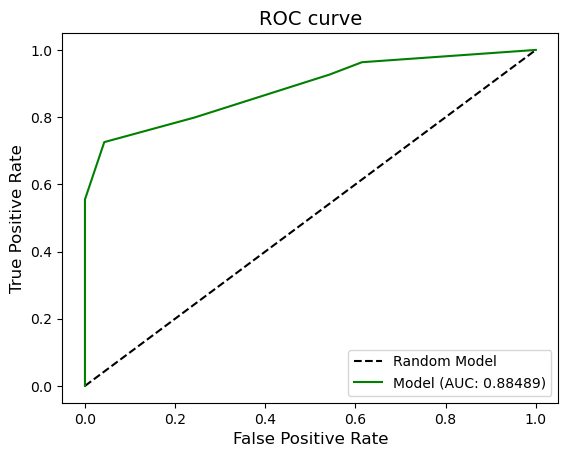

In [31]:
optbin.scorecard.plot_auc_roc(y_train, y_prob_train)

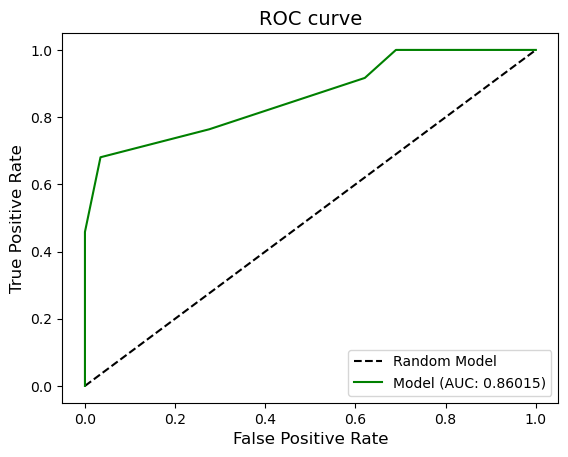

In [32]:
optbin.scorecard.plot_auc_roc(y_test, y_prob_test)

En el contexto del análisis CAP, un coeficiente de Gini de 0,76 indica un desempeño relativamente bueno del modelo. Un coeficiente de Gini más alto en la curva CAP significa que las predicciones del modelo están más alineadas con las instancias positivas. Un coeficiente de Gini de 0,76 sugiere que el modelo funciona mejor que el azar al distinguir instancias positivas.

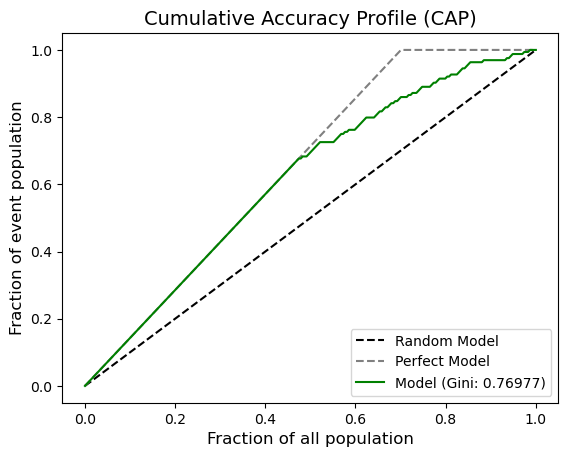

In [33]:
# CAP sobre train
optbin.scorecard.plot_cap(y_train, y_prob_train)


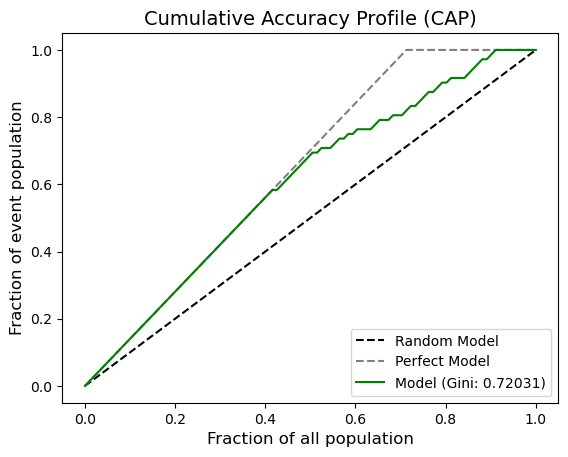

In [34]:
optbin.scorecard.plot_cap(y_test, y_prob_test)

La prueba de Kolmogorov-Smirnov (KS) es una prueba estadística utilizada para evaluar la similitud entre dos distribuciones de probabilidad o para comparar una distribución observada con una distribución de referencia. Mide la distancia vertical máxima entre las funciones de distribución acumulativa (CDF) de las dos distribuciones que se comparan.

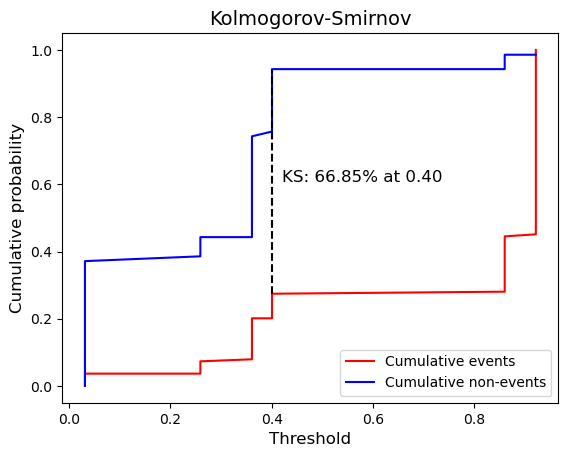

In [35]:
optbin.scorecard.plot_ks(y_train, y_prob_train) 

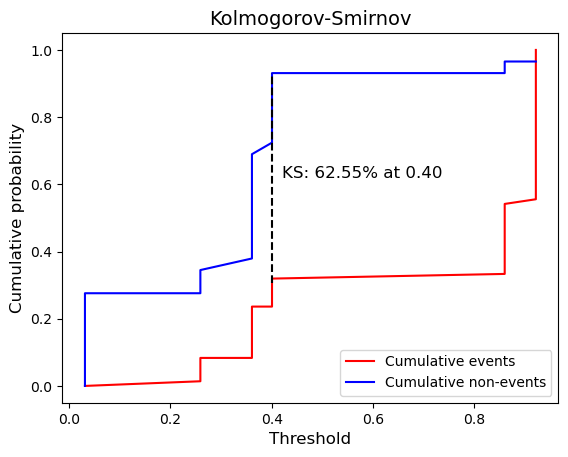

In [36]:
optbin.scorecard.plot_ks(y_test, y_prob_test)

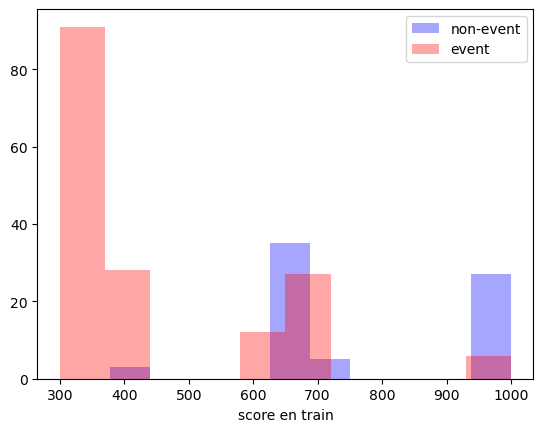

In [37]:
# Distribución de scores para buenos y malos en train
score_train = scorecard.score(X_train)
mask = y_train == 0
plt.hist(score_train[mask], label="non-event", color="b", alpha=0.35)
plt.hist(score_train[~mask], label="event", color="r", alpha=0.35)
plt.xlabel("score en train")
plt.legend()
plt.show()

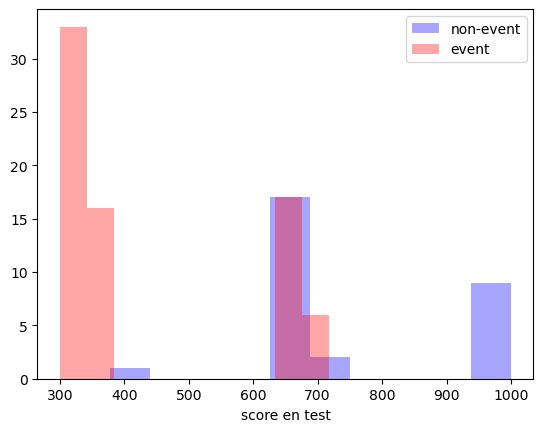

In [38]:
# Distribución de scores para buenos y malos en test
score_test = scorecard.score(X_test)
mask = y_test == 0
plt.hist(score_test[mask], label="non-event", color="b", alpha=0.35)
plt.hist(score_test[~mask], label="event", color="r", alpha=0.35)
plt.xlabel("score en test")
plt.legend()
plt.show()

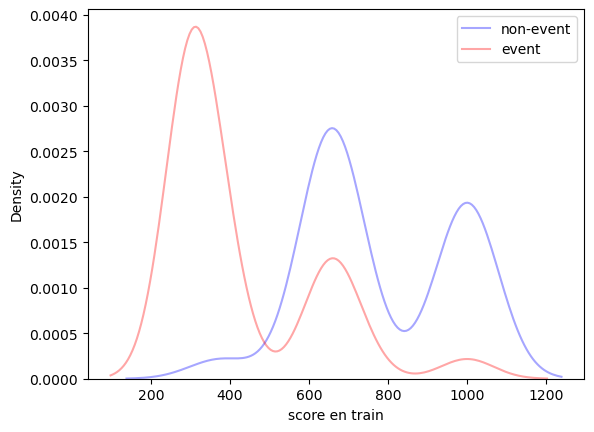

In [39]:
# Distribución de scores para buenos y malos en train
import seaborn as sns
score_train = scorecard.score(X_train)
mask = y_train == 0
sns.kdeplot(score_train[mask], label="non-event", color="b", alpha=0.35)
sns.kdeplot(score_train[~mask], label="event", color="r", alpha=0.35)
plt.xlabel("score en train")
plt.legend()
plt.show()

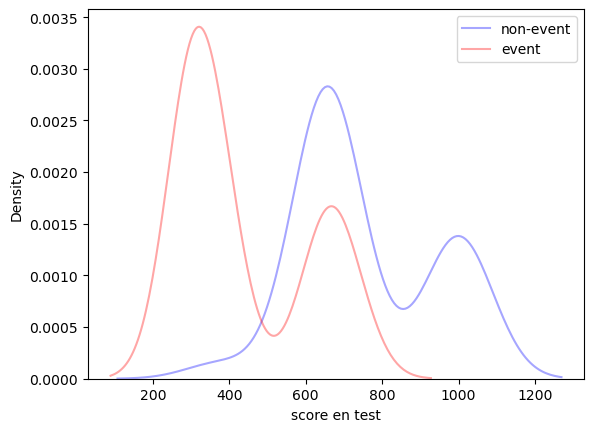

In [40]:
# Distribución de scores para buenos y malos en test
score_test = scorecard.score(X_test)
mask = y_test == 0
sns.kdeplot(score_test[mask], label="non-event", color="b", alpha=0.35)
sns.kdeplot(score_test[~mask], label="event", color="r", alpha=0.35)
plt.xlabel("score en test")
plt.legend()
plt.show()

Una distribución con tres crestas generalmente sugiere una distribución multimodal, lo que significa que tiene múltiples picos o modos distintos. Cada cresta representa un pico prominente en la distribución donde se concentran los puntos de datos.

Según la información proporcionada, parece que existe una correlación entre los niveles de ingresos más bajos y la probabilidad de tener deudas. Las personas que ganan alrededor de $300 y las que tienen ingresos inferiores a $800 parecen ser particularmente vulnerables a endeudarse, incluso si invierten.

In [41]:
# Matriz de confusión sobre train
print(skmet.classification_report(y_train, np.where(y_prob_train>0.5, 1, 0)))

              precision    recall  f1-score   support

           0       0.60      0.96      0.74        70
           1       0.98      0.73      0.83       164

    accuracy                           0.79       234
   macro avg       0.79      0.84      0.78       234
weighted avg       0.86      0.79      0.80       234



In [42]:
# Matriz de confusión sobre test
print(skmet.classification_report(y_test, np.where(y_prob_test>0.5, 1, 0)))

              precision    recall  f1-score   support

           0       0.55      0.97      0.70        29
           1       0.98      0.68      0.80        72

    accuracy                           0.76       101
   macro avg       0.76      0.82      0.75       101
weighted avg       0.86      0.76      0.77       101



(0.0, 1.0)

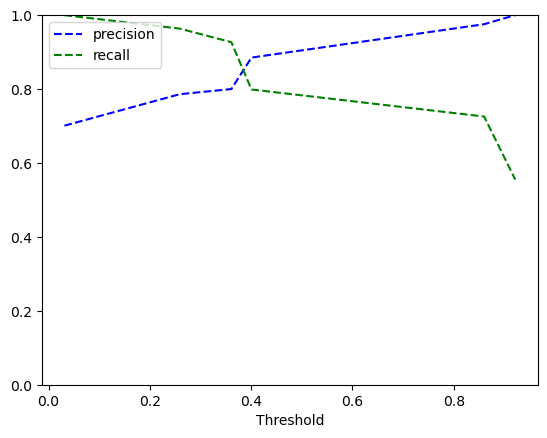

In [43]:
# Curva precission-recall para optimizar el punto de corte
prec, rec, thre = skmet.precision_recall_curve(y_train, y_prob_train)
plt.plot(thre, prec[:-1], 'b--', label='precision')
plt.plot(thre, rec[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])

In [50]:
print(skmet.classification_report(y_train, np.where(y_prob_train>0.8, 1, 0)))

              precision    recall  f1-score   support

           0       0.60      0.96      0.74        70
           1       0.98      0.73      0.83       164

    accuracy                           0.79       234
   macro avg       0.79      0.84      0.78       234
weighted avg       0.86      0.79      0.80       234



In [51]:
# Matriz de confusión sobre test (con nuevo corte)
print(skmet.classification_report(y_test, np.where(y_prob_test>0.8, 1, 0)))

              precision    recall  f1-score   support

           0       0.55      0.97      0.70        29
           1       0.98      0.68      0.80        72

    accuracy                           0.76       101
   macro avg       0.76      0.82      0.75       101
weighted avg       0.86      0.76      0.77       101



# 9. Utilización de los resultados del análisis
Después de que los resultados del análisis se pongan a disposición de los usuarios de negocio para apoyar la toma de decisiones empresariales, por ejemplo a través de cuadros de mando o paneles, puede haber más oportunidades para utilizar los resultados del análisis. La etapa de utilización de los resultados del análisis, esta enfocada en determinar cómo y dónde se pueden aprovechar más los datos del análisis procesado.

In [52]:
# Haga un breve análisis de los hallazgos 
scorecard.table(style="summary").groupby("Variable").agg({'Points' : [np.min, np.max]}).sum()

Points  amin     300.0
        amax    1000.0
dtype: float64

Según el análisis realizado, parece que las personas con ingresos mensuales que oscilan entre $ 300 y $ 1000 aún pueden ser elegibles para préstamos, a pesar de tener deudas existentes o participar en inversiones. Sin embargo, es importante tener en cuenta que la elegibilidad del préstamo está influenciada por varios factores, incluido el historial crediticio, la relación deuda-ingreso y las políticas específicas de la institución crediticia.

En conclusión, la utilización de varias herramientas proporcionadas por el modelo ha sido fundamental para realizar un estudio completo y perspicaz. Estas herramientas han facilitado el análisis visual y permitido el uso de diversas métricas para obtener una comprensión más profunda del tema. Al aprovechar estas herramientas, se han obtenido valiosos conocimientos, mejorando la calidad general y la precisión del estudio.

# Qué acciones sugerería a los directivos de la empresa?
-Considere las circunstancias individuales: si bien un rango de ingresos mensuales de $300 a $800

-Relación deuda-ingreso: Los prestamistas a menudo consideran la relación deuda-ingreso del solicitante, que compara sus pagos mensuales de deuda con su ingreso mensual.
